In [9]:
import random
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib 
import matplotlib.colors as colors
%matplotlib inline

from datetime import date, timedelta, datetime
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec

from collections import Counter
%matplotlib inline

In [10]:
from nltk import bigrams
from nltk import FreqDist
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laxmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
pip install -U gensim

Requirement already up-to-date: gensim in c:\users\laxmi\anaconda3\lib\site-packages (3.8.3)Note: you may need to restart the kernel to use updated packages.



In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

from gensim import corpora, models

In [13]:
train = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')
print("Train set size:", train.shape)

Train set size: (5268, 13)


In [14]:
train.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [18]:
train.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [19]:
train.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [20]:
"""Time - High percentage of missing values
Flight Number - High percentage of missing values
Route - High percentage of missing values
cn/In - High percentage of missing values
Summary - High percentage of missing values, but the data is essential to this project
These columns can be deleted, as they are not necessary"""

'Time - High percentage of missing values\nFlight Number - High percentage of missing values\nRoute - High percentage of missing values\ncn/In - High percentage of missing values\nSummary - High percentage of missing values, but the data is essential to this project\nThese columns can be deleted, as they are not necessary'

In [21]:
#Counting the frequency of each value in Time column

In [22]:
train['Time'].value_counts()

15:00      32
12:00      31
11:00      29
19:30      26
16:00      26
           ..
16:21       1
15:18       1
c: 9:40     1
23:28       1
07:26       1
Name: Time, Length: 1005, dtype: int64

In [23]:
#Box Plots, Dist Plot  -- Distribution of values over the given range for the dataset for fatalities column

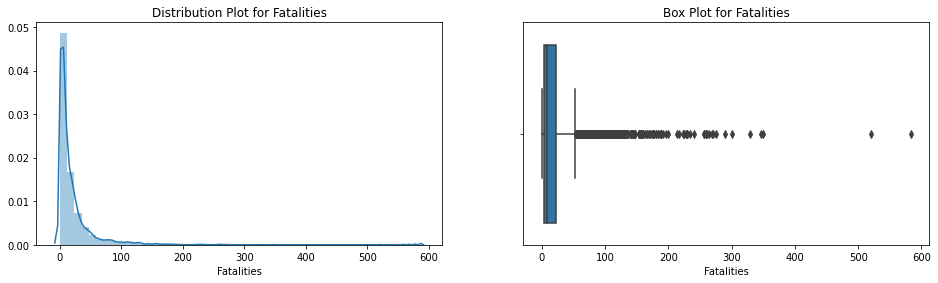

In [24]:
plt.figure(figsize=(16,9))


plt.subplot(2,2,1)
sns.distplot(train['Fatalities'])
plt.title('Distribution Plot for Fatalities')

plt.subplot(2,2,2)
sns.boxplot(train['Fatalities'])
plt.title('Box Plot for Fatalities')
plt.show()

In [25]:
#dist plot and box plot for Aboard Column

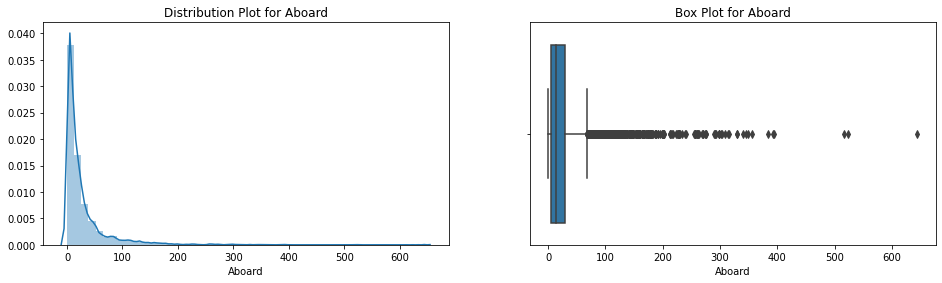

In [26]:
plt.figure(figsize=(16,9))

plt.subplot(2,2,1)
sns.distplot(train['Aboard'])
plt.title('Distribution Plot for Aboard')
plt.subplot(2,2,2)
sns.boxplot(train['Aboard'])
plt.title('Box Plot for Aboard')

plt.show()

In [27]:
#Date Column is converted to Date Time
train['Date'] = pd.to_datetime(train['Date'])
train['Date'] = train['Date'].dt.strftime("%d/%m/%Y")


In [28]:
train.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,06/08/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [29]:
#Replace the Time column with maximum repeated value
train_first = train.copy()
train['Time'].fillna('15:00', inplace = True)
train['Time'] = train['Time'].replace(np.nan, '00:00') ####
train['Time'] = train['Time'].str.replace('c: ', '')
train['Time'] = train ['Time'].str.replace('c:', '')
train['Time'] = train ['Time'].str.replace('c', '')
train['Time'] = train ['Time'].str.replace('12\'20', '12:20')
train['Time'] = train ['Time'].str.replace('18.40', '18:40')
train['Time'] = train ['Time'].str.replace('0943', '09:43')
train['Time'] = train ['Time'].str.replace('22\'08', '22:08')
train['Time'] = train ['Time'].str.replace('114:20', '00:00')

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          5268 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [31]:
train.isnull().sum()

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [32]:

train["Survival Rate"] = 100 * (train["Aboard"] - train["Fatalities"]) / train["Aboard"]
train['Survival Rate'].fillna(0, inplace = True)


In [33]:
train['Year'] = pd.DatetimeIndex(train['Date']).year

In [34]:
train.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survival Rate,Year
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.0,1908
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,1912
2,06/08/1913,15:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,1913
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,30.0,1913
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,1913


In [35]:
# Some statistics of Operator and Fatalaties column to use further

operator = train[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])

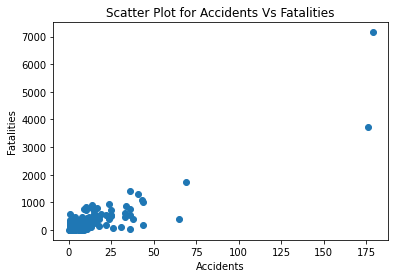

In [36]:
# Cleaning Fatalities(sum) column and plotting them against the accidents(count)

train['Fatalities'] = train['Fatalities'].fillna(0)
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
plt.scatter(X, Y,label='Operators')
plt.title('Scatter Plot for Accidents Vs Fatalities')
plt.ylabel('Fatalities')
plt.xlabel('Accidents');

In [37]:
# checking fatality rate during an accident

train_first['Fatalities_percentage'] = train['Fatalities'] / train['Aboard']
print(train_first['Fatalities_percentage'].head(5))

0    0.5
1    1.0
2    1.0
3    0.7
4    1.0
Name: Fatalities_percentage, dtype: float64


In [38]:
# Finding variations in fatalities using Skewness, Kurtosis of Fatalities feature.

print("Skewness: %f" % train['Fatalities'].skew())
print("Kurtosis: %f" % train['Fatalities'].kurt())

Skewness: 4.952818
Kurtosis: 42.889113


<AxesSubplot:title={'center':'Log Normal'}, xlabel='Fatalities'>

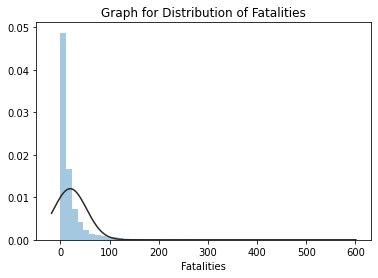

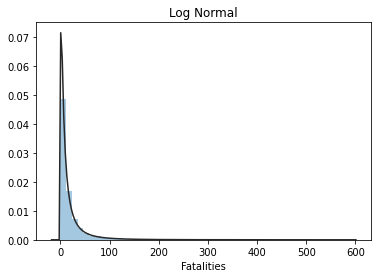

In [39]:
# Distribution of fatalities

y = train['Fatalities']
plt.figure(2); plt.title('Normal')
plt.title('Graph for Distribution of Fatalities')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [40]:
# Interesting facts by applying log value for Fatalities

train["log_Fatalities"] = np.log1p(train["Fatalities"])

In [41]:
# Finding Skewness, Kurtosis for log value of Fatalities.

print("Skewness: %f" % train['log_Fatalities'].skew())
print("Kurtosis: %f" % train['log_Fatalities'].kurt())

Skewness: 0.339361
Kurtosis: -0.467497


In [42]:
train.head(3)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survival Rate,Year,log_Fatalities
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.0,1908,0.693147
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,1912,1.791759
2,06/08/1913,15:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,1913,0.693147


<AxesSubplot:title={'center':'Heat map for correlation matrix'}>

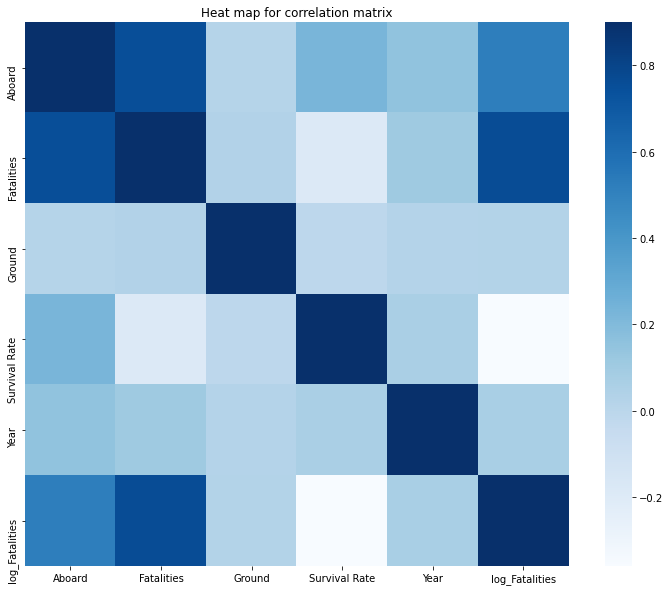

In [43]:
# Heat map for correlation matrix of training dataset

corr = train.corr()
plt.subplots(figsize=(13,10))
plt.title('Heat map for correlation matrix')
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)  

<AxesSubplot:xlabel='Operator'>

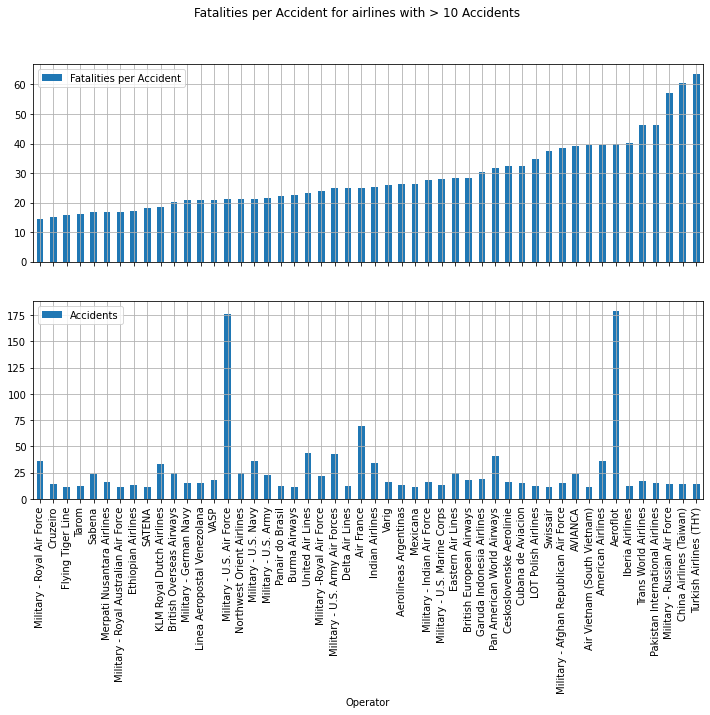

In [44]:
# Proportion of fatalities per accident for specific operators using a bar graph

matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
props = operator['Fatalities'].reset_index()
props['Fatalities per Accident'] = props['sum']/props['count']
props.columns = ['Operator','Fatalities','Accidents','Fatalities per Accident']

fig_p,(axp1,axp2) = plt.subplots(2,1,sharex = True)
minacc = 10
fig_p.suptitle('Fatalities per Accident for airlines with > %s Accidents' % minacc)
propstoplot = props[props['Accidents']>minacc]
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator', y = 'Fatalities per Accident', ax = axp1, kind = 'bar', grid = True)
propstoplot.sort_values('Fatalities per Accident').tail(50).plot(x = 'Operator', y = 'Accidents', ax = axp2, kind = 'bar' , grid = True)

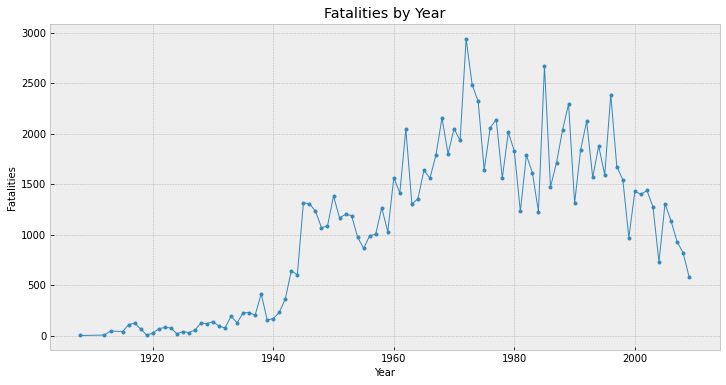

In [45]:
# Plot to check the number of fatalities yearly.

yearly = train[['Year','Fatalities']].groupby('Year').agg(['sum','count'])
plt.style.use('bmh')
plt.figure(figsize=(12,6))
yearly['Fatalities','sum'].plot(title='Fatalities by Year',marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)
plt.show()	

In [46]:
#Combining date and time for datetime format
train['Time1'] = train['Date'] + ' ' + train['Time'] 
def todate(x):
    return datetime.strptime(x, '%d/%m/%Y %H:%M')
 #convert datetime to date type
train['Time1'] = train['Time1'].apply(todate)
#Temp is going to be temporary data frame for datetime stamp
Temp = train.groupby(train.Time1.dt.year)[['Date']].count() 
Temp = Temp.rename(columns={"Date": "Count"})


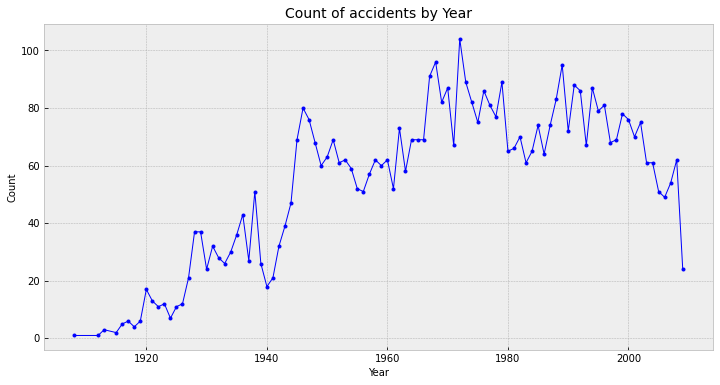

In [47]:
#Plotting no of accidents rate for years
plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

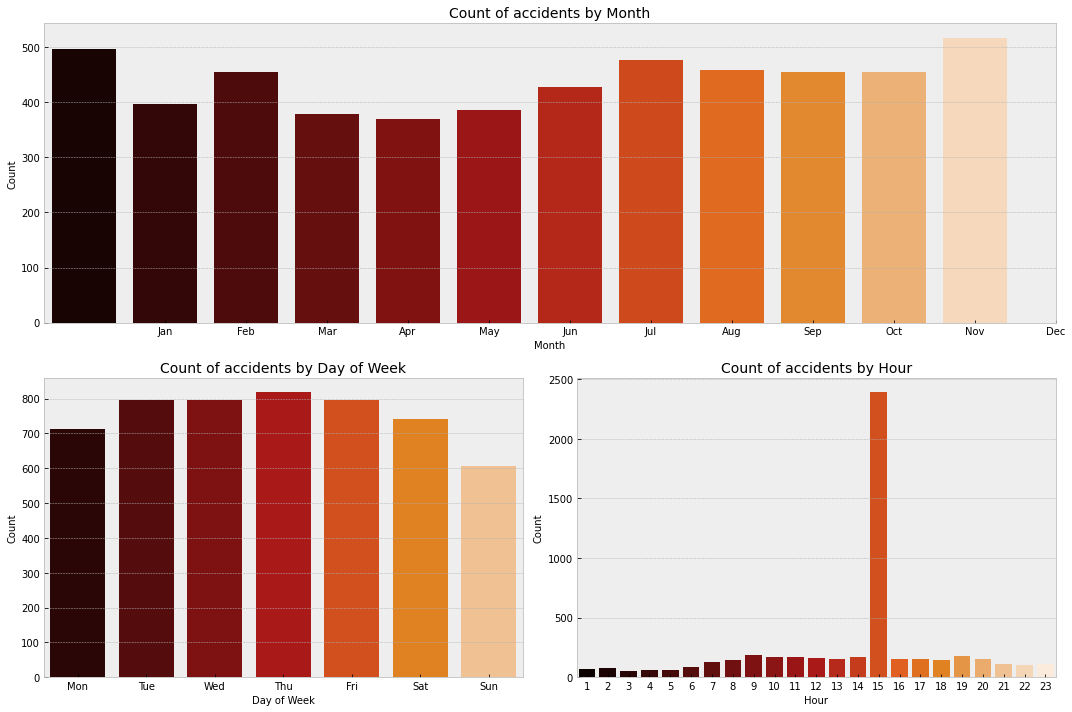

In [48]:
gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(15,10))
plt.style.use('seaborn-muted')
ax = pl.subplot(gs[0, :]) # row 0, col 0
sns.barplot(train.groupby(train.Time1.dt.month)[['Date']].count().index, 'Date', data= train_first.groupby(train.Time1.dt.month)[['Date']].count(), palette="gist_heat", linewidth=2)
plt.xticks(train.groupby(train.Time1.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Month', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 0])
sns.barplot(train.groupby(train.Time1.dt.weekday)[['Date']].count().index, 'Date', data=train_first.groupby(train.Time1.dt.weekday)[['Date']].count(), palette="gist_heat", linewidth=2)
plt.xticks(train.groupby(train.Time1.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

ax = pl.subplot(gs[1, 1])
sns.barplot(train[train.Time1.dt.hour != 0].groupby(train.Time1.dt.hour)[['Date']].count().index, 'Date', data=train[train.Time1.dt.hour != 0].groupby(train.Time1.dt.hour)[['Date']].count(),palette="gist_heat", linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
#Each Feature top findings and unique values

In [50]:
train['Time'].describe()

count      5268
unique      994
top       15:00
freq       2251
Name: Time, dtype: object

In [51]:
train['Type'].describe()

count             5241
unique            2446
top       Douglas DC-3
freq               334
Name: Type, dtype: object

In [52]:
train['Location'].describe()

count               5248
unique              4303
top       Moscow, Russia
freq                  15
Name: Location, dtype: object

In [53]:
train['Operator'].describe()

count         5250
unique        2476
top       Aeroflot
freq           179
Name: Operator, dtype: object

In [54]:
#Mean, Max and minimum of Features

In [55]:
train['Aboard'].describe()

count    5246.000000
mean       27.554518
std        43.076711
min         0.000000
25%         5.000000
50%        13.000000
75%        30.000000
max       644.000000
Name: Aboard, dtype: float64

In [56]:
train['Fatalities'].describe()

count    5268.000000
mean       20.022589
std        33.175910
min         0.000000
25%         3.000000
50%         9.000000
75%        23.000000
max       583.000000
Name: Fatalities, dtype: float64

In [57]:
train['Survival Rate'].describe()

count    5268.000000
mean       16.431638
std        29.829690
min         0.000000
25%         0.000000
50%         0.000000
75%        19.047619
max       100.000000
Name: Survival Rate, dtype: float64

In [58]:
train['Year'].describe()

count    5268.000000
mean     1971.300304
std        22.387541
min      1908.000000
25%      1954.000000
50%      1973.000000
75%      1990.000000
max      2009.000000
Name: Year, dtype: float64

In [59]:
#Fatality and Accident Trends

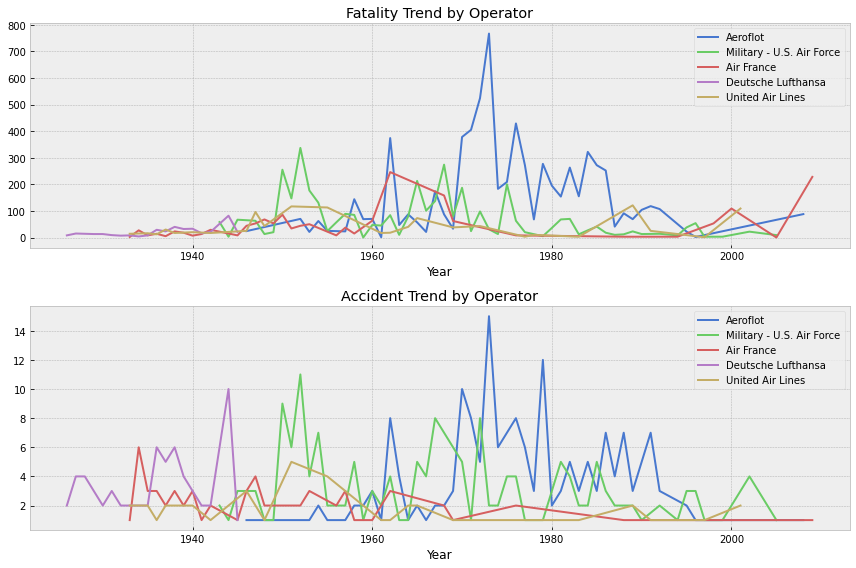

In [60]:
accidents = operator['Fatalities','count'].sort_values(ascending=False)
interestingOps = accidents.index.values.tolist()[0:5]
optrend = train[['Operator','Year','Fatalities']].groupby(['Operator','Year']).agg(['sum','count'])
ops = optrend['Fatalities'].reset_index()
fig,axtrend = plt.subplots(2,1)
for op in interestingOps:
    ops[ops['Operator']==op].plot(x='Year',y='sum',ax=axtrend[0],grid=True,linewidth=2)
    ops[ops['Operator']==op].plot(x='Year',y='count',ax=axtrend[1],grid=True,linewidth=2)

axtrend[0].set_title('Fatality Trend by Operator')
axtrend[1].set_title('Accident Trend by Operator')
linesF, labelsF = axtrend[0].get_legend_handles_labels()
linesA, labelsA = axtrend[1].get_legend_handles_labels()
axtrend[0].legend(linesF,interestingOps)
axtrend[1].legend(linesA,interestingOps)
plt.tight_layout()


In [61]:
train["Survival Rate"] = 100 * (train["Aboard"] - train["Fatalities"]) / train["Aboard"]
train.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survival Rate,Year,log_Fatalities,Time1
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.0,1908,0.693147,1908-09-17 17:18:00
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,1912,1.791759,1912-07-12 06:30:00
2,06/08/1913,15:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,1913,0.693147,1913-08-06 15:00:00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,30.0,1913,2.708050,1913-09-09 18:30:00
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,1913,3.433987,1913-10-17 10:30:00


In [62]:
#Average Survival Rate Trends

In [63]:
#Finding mean for survival rate
data_mean = train["Survival Rate"].mean()

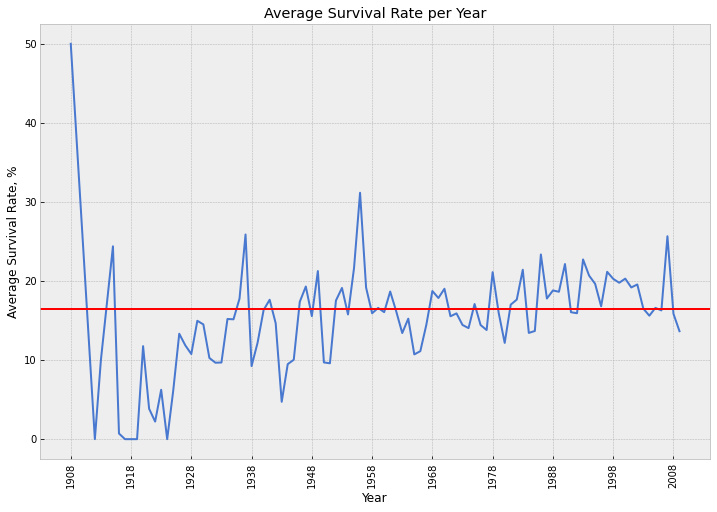

In [64]:
yearly_survival = train[["Date","Survival Rate"]].groupby(train["Time1"].dt.year).agg(["mean"])
yearly_survival.plot(legend=None)
plt.ylabel("Average Survival Rate, %")
plt.xlabel("Year")
plt.title("Average Survival Rate per Year")
plt.xticks([x for x in range(1908,2009,10)], rotation='vertical')
plt.axhline(y=data_mean, color='r', linestyle='-')
plt.show()

In [65]:
#Violin charts

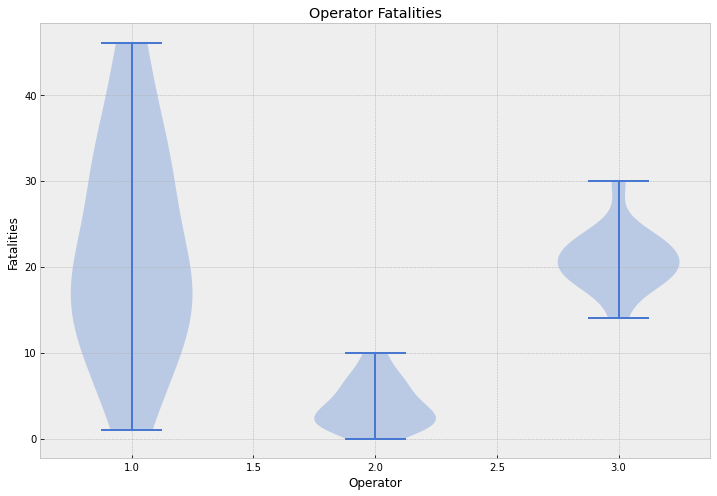

In [66]:

x = np.random.poisson(lam =5, size=100)
y = np.random.choice(["S{}".format(i+1) for i in range(5)], size=len(x))
df = pd.DataFrame({"Scenario":y, "LMP":x})

fig, axes = plt.subplots()

axes.violinplot(dataset = [train[train.Operator == 'Military - U.S. Army']["Fatalities"].values,
                           train[train.Operator == 'Private']["Fatalities"].values,
                           train[train.Operator == 'Military - German Navy']["Fatalities"].values])

axes.set_title('Operator Fatalities')
axes.yaxis.grid(True)
axes.set_xlabel('Operator')
axes.set_ylabel('Fatalities')

plt.show()

Top 3 Operator Fatality Violin Chart


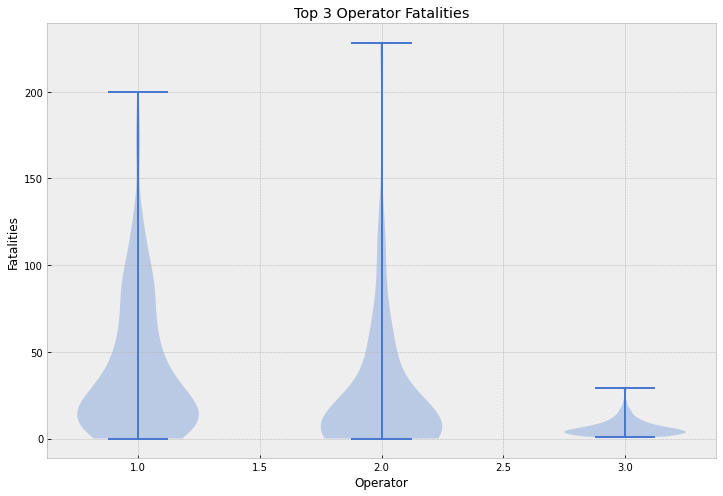

In [67]:
x = np.random.poisson(lam =5, size=100)
y = np.random.choice(["S{}".format(i+1) for i in range(5)], size=len(x))
df = pd.DataFrame({"Scenario":y, "LMP":x})

fig, axes = plt.subplots()

axes.violinplot(dataset = [train[train.Operator == 'Aeroflot']["Fatalities"].values,
                           train[train.Operator == 'Air France']["Fatalities"].values,
                           train[train.Operator == 'Deutsche Lufthansa']["Fatalities"].values])

print("Top 3 Operator Fatality Violin Chart")
axes.set_title('Top 3 Operator Fatalities')
axes.yaxis.grid(True)
axes.set_xlabel('Operator')
axes.set_ylabel('Fatalities')

plt.show()

Top 3 Location Fatality Violin charts


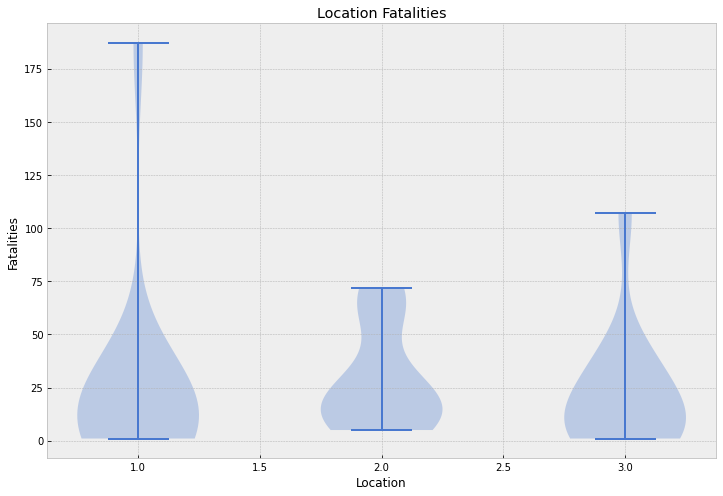

In [68]:
x = np.random.poisson(lam =5, size=100)
y = np.random.choice(["S{}".format(i+1) for i in range(5)], size=len(x))
df = pd.DataFrame({"Scenario":y, "LMP":x})

fig, axes = plt.subplots()

axes.violinplot(dataset = [train[train.Location == 'Sao Paulo, Brazil']["Fatalities"].values,
                           train[train.Location == 'Moscow, Russia']["Fatalities"].values,
                           train[train.Location == 'Bogota, Colombia']["Fatalities"].values])
print("Top 3 Location Fatality Violin charts")
axes.set_title('Location Fatalities')
axes.yaxis.grid(True)
axes.set_xlabel('Location')
axes.set_ylabel('Fatalities')

plt.show()

In [69]:
crashes_per_year = Counter(train['Year'])
years = list(crashes_per_year.keys())
crashes_year = list(crashes_per_year.values())

In [70]:
survived = []
dead = []
for year in years:
    curr_data = train[train['Year'] == year]
    survived.append(curr_data['Aboard'].sum() - curr_data['Fatalities'].sum())
    dead.append(curr_data['Fatalities'].sum())

In [71]:
#Worst Flight Operators

In [72]:
oper_list = Counter(train['Operator']).most_common(12)
operators = []
crashes = []
for tpl in oper_list:
    if 'Military' not in tpl[0]:
        operators.append(tpl[0])
        crashes.append(tpl[1])
print('Top 10 the worst operators')
pd.DataFrame({'Count of crashes' : crashes}, index=operators)

Top 10 the worst operators


,Count of crashes
Aeroflot,179
Air France,70
Deutsche Lufthansa,65
China National Aviation Corporation,44
United Air Lines,44
Air Taxi,44
Pan American World Airways,41
US Aerial Mail Service,36
American Airlines,36


In [73]:
#Most Dangerous Locations

In [74]:
loc_list = Counter(train['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
print('Top 10 the most dangerous locations')
pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

Top 10 the most dangerous locations


,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


In [75]:
#Location Based Fatality Analyzation

In [76]:
route= train.groupby('Location').agg({'Fatalities':['sum',lambda x:x.sum() / train['Fatalities'].sum()]})
route.columns=route.columns.map(''.join)
route.reset_index(inplace=True)
route.rename(columns={'Fatalitiessum':'Total Fatalities','Fatalities<lambda_0>':'% of Total Fatalities'}, inplace=True)

route.sort_values(by='Total Fatalities', ascending=False).head(7)

,Location,Total Fatalities,% of Total Fatalities
4034,"Tenerife, Canary Islands",761.0,0.007215
1776,"Mt. Osutaka, near Ueno Village, Japan",520.0,0.004930
1709,"Moscow, Russia",432.0,0.004096
2522,"Near Moscow, Russia",364.0,0.003451
3780,"Sao Paulo, Brazil",362.0,0.003432
2053,"Near Charkhidadri, India",349.0,0.003309
2160,"Near Ermenonville, France",346.0,0.003280


In [77]:
# Exploring the Cause of Crashes
#Let's analyse a "Summary" column and highlight the main themes that occur in the texts in this column. I will use gensim topic modelling library for this.

In [78]:
summary = train['Summary'].tolist()
punctuation = ['.', ',', ':']
texts = []

for text in summary:
    cleaned_text = str(text).lower()   
    for mark in punctuation:
        cleaned_text = cleaned_text.replace(mark, '')       
    texts.append(cleaned_text.split())

In [79]:
dictionary = corpora.Dictionary(texts)

In [80]:
word_list = []
for key, value in dictionary.dfs.items():
    if value > 100:
        word_list.append(key)

In [81]:
dictionary.filter_tokens(word_list)
corpus = [dictionary.doc2bow(text) for text in texts]

In [82]:
np.random.seed(76543)
lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=5)

In [83]:
topics = lda.show_topics(num_topics=10, num_words=15, formatted=False)
for topic in topics:
    num = int(topic[0]) + 1
    print('Cause %d:' % num, end=' ')
    print(', '.join([pair[0] for pair in topic[1]]))

Cause 1: descending, radar, clearance, mountainous, ridge, passenger, adequate, management, their, remote, cruise, atc, jungle, meteorological, been
Cause 2: oil, subsequent, canyon, destroyed, included, km, coordination, lines, missing, pressure, number, flap, turned, double, maintenance
Cause 3: stall, end, nose, attitude, warning, 1, snow, ils, airspeed, overloaded, rudder, captain's, until, missed, follow
Cause 4: side, positioning, thrust, cessna, use, maintenance, went, carrying, tower, problems, seconds, rolled, reverse, their, angle
Cause 5: disappeared, impacted, contact, ceiling, later, they, meteorological, destination, days, along, training, factor, 10, experience, island
Cause 6: rebels, missile, ocean, controlled, lake, hillside, icing, km, experiencing, only, military, indicated, surface-to-air, unita, excessive
Cause 7: jet, other, military, avoid, winds, just, maneuver, midair, burst, see, fighter, transport, may, houses, been
Cause 8: international, cockpit, weight, t

In [84]:
#While I was analysing the words in each topic, I have identified the following causes (they may not reflect the actual reason for the crash):

#Cause 1: Spatial disorientation due to bad weather conditions.

#Cause 2: Stalled the engine. The explosion or destruction of the aircraft from falling to the ground or collision with the building.

#Cause 3: Failure of the rotor or problems with the fuselage (specifically problems with the tail). It is also a possible mistake of the Air Traffic Control centre.

#Cause 4: Bad weather conditions: strong wind, snow, ice. The plane disappeared from radar.

#Cause 5: Taking off without clearance from ATC. ATC or pilots error.

#Cause 6: Crash due to manoeuvring. Most likely refers to the testing and training missions.

#Cause 7: The plane was hijacked or captured by the rebels. Fell to the ground due to issues with piloting or bad weather conditions.

#Cause 8: The plane was destroyed by explosion and destruction of the fuselage. The cause of the explosion could be a bomb or fuel tank.

#Cause 9: The malfunction of the autopilot and remote control systems. Most likely associated with transport aircraft.

#Cause 10: Navigation problems, technical malfunction. 

In [85]:
#Most Frequent Bigrams of Summary

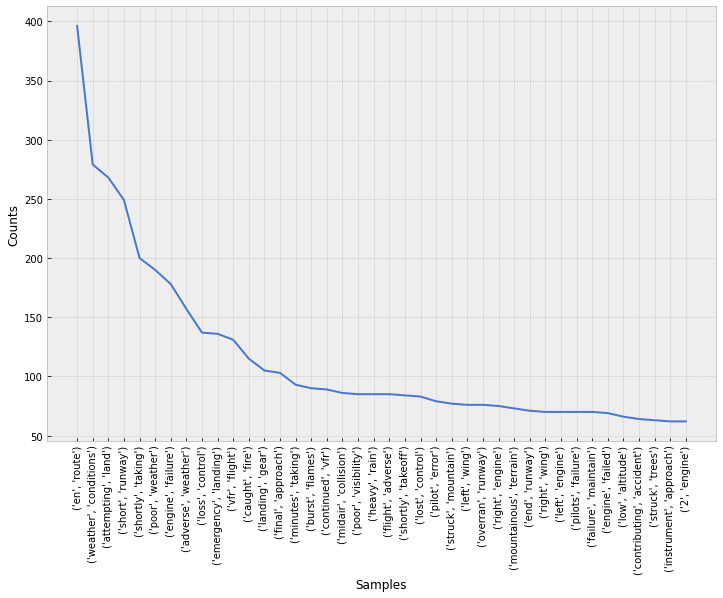

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [86]:
def remove_punctuation(s):
    exclude = set(string.punctuation)
    s = ''.join([i for i in s if i not in exclude])
    return s

stop = stopwords.words('english')
stop.append('plane')
stop.append('crashed')
stop.append('aircraft')

t = train[['Summary','Fatalities']].dropna()
book = t['Summary'].str.lower().apply(remove_punctuation).str.split().values.sum()
wrd = [w for w in book if w not in stop]


bigrams = list(bigrams(wrd))
fdistBigram = FreqDist(bigrams)
fdistBigram.plot(40)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.metrics import adjusted_rand_score

In [88]:
# We chose Summary column for applying KMeans model on input data. After applying KMeans, we do some clustering analysis.abs

#Droping null values from Summary column
text_knn_data = train['Summary'].dropna()
text_knn_data = pd.DataFrame(text_knn_data)

In [89]:
documents = list(text_knn_data['Summary'])

#DApplying TfIdf vectorization for Summary column to apply KMeans model
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

[0.009939503379162157, 0.012100530657280647, 0.013965715660331434, 0.013756218531675161, 0.014349283380081304, 0.014208488283230165, 0.012980983502694726]


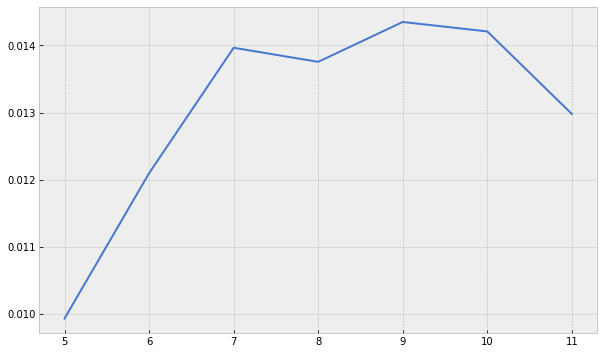

In [90]:
from sklearn.metrics import silhouette_score
random_state = 0 
sil_array = []
k_maximum = 11
for k in range(5, k_maximum+1):
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(X)
    labels = model.labels_
    sil_array.append(silhouette_score(X, labels, metric = 'euclidean'))

fig, graph = plt.subplots(figsize=(10, 6))

# Define x and y axes
print(sil_array)
graph.plot([5,6,7,8,9,10,11], sil_array)

plt.show()

In [91]:
#Using above graph, we found optimal k as 9, so applying KMeans model using optimal number of clusters as 9

model = KMeans(n_clusters=9, max_iter=100, n_init=1)
model.fit(X)
print ('Cluster wise analysis:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

#For all the clusters, printing top 8 frequent words in the cluster.
for i in range(9):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :8]: #
        print ('%s' % terms[j]),
    print

Cluster wise analysis:


Cluster 0:
struck
mountain
aircraft
ground
plane
runway
trees
lightning


Cluster 1:
crashed
aircraft
takeoff
plane
engine
failure
flight
pilot


Cluster 2:
taking
shortly
crashed
engine
plane
takeoff
failure
aircraft


Cluster 3:
landing
emergency
runway
crashed
engine
plane
aircraft
attempt


Cluster 4:
attempting
land
crashed
plane
runway
fog
cargo
airport


Cluster 5:
en
route
crashed
disappeared
mountain
plane
cargo
mountains


Cluster 6:
approach
crashed
runway
short
aircraft
final
pilot
crew


Cluster 7:
cargo
plane
crashed
takeoff
runway
struck
mountain
engine


Cluster 8:
weather
conditions
mountain
vfr
adverse
poor
flight
continued


In [92]:
#Using above graph, we found optimal k as 9, so applying KMeans model using optimal number of clusters as 9

model = KMeans(n_clusters=9, max_iter=100, n_init=1)
model.fit(X)
print ('Cluster wise analysis:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

#For all the clusters, printing top 8 frequent words in the cluster.
for i in range(9):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :8]: #
        print ('%s' % terms[j]),
    print

Cluster wise analysis:


Cluster 0:
engine
failure
crashed
takeoff
plane
aircraft
emergency
failed


Cluster 1:
weather
conditions
vfr
adverse
poor
flight
continued
pilot


Cluster 2:
aircraft
crashed
plane
pilot
flight
control
shot
crew


Cluster 3:
taking
shortly
crashed
plane
engine
airport
aircraft
minutes


Cluster 4:
en
route
crashed
disappeared
mountain
plane
cargo
mountains


Cluster 5:
takeoff
crashed
shortly
engine
overloaded
failure
plane
exploded


Cluster 6:
approach
runway
crashed
plane
cargo
attempting
landing
short


Cluster 7:
mountain
struck
flew
crashed
ft
poor
000
cargo


Cluster 8:
fog
heavy
rain
crashed
land
runway
attempting
approach


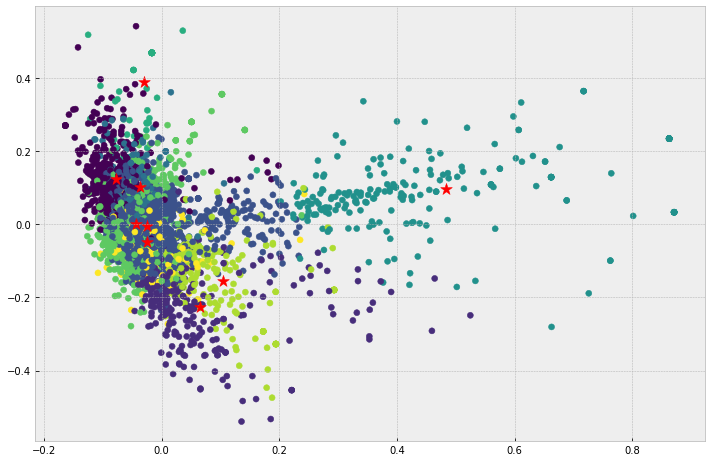

In [93]:
#Using PCA on input data
pca = PCA(n_components=2, random_state=random_state)
reduced_new_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_new_cluster_centers = pca.transform(model.cluster_centers_)
plot.scatter(reduced_new_features[:,0], reduced_new_features[:,1], c=model.predict(X))
plot.scatter(reduced_new_cluster_centers[:, 0], reduced_new_cluster_centers[:,1], marker='*', s=150, c='r')

In [94]:


Y = vectorizer.transform(["engine failure"])
engine_failure_prediction = model.predict(Y)

Y = vectorizer.transform(["terrorism"])
terrorism_prediction = model.predict(Y)

print("Predicted results wrt engine failure",engine_failure_prediction)
print("Predicted results wrt terrorism",terrorism_prediction)


Predicted results wrt engine failure [0]
Predicted results wrt terrorism [2]


In [97]:
# coverting the NaN values to 0
train['Aboard'] = train['Aboard'].replace(np.nan,0)
train['Fatalities'] = train['Fatalities'].replace(np.nan,0)
train['Survival Rate'] = train['Survival Rate'].replace(np.nan,0)


In [98]:
# converting the floating point values to finite values to support hierarchical clustering
train["Aboard"] = [int(i) for i in train["Aboard"]]
train["Fatalities"] = [int(i) for i in train["Fatalities"]]
train["Survival Rate"] = [int(i) for i in train["Survival Rate"]]

In [100]:
# preview of values in the above columns after preprocessing

train.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survival Rate,Year,log_Fatalities,Time1
0,17/09/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2,1,0.0,"During a demonstration flight, a U.S. Army fly...",50,1908,0.693147,1908-09-17 17:18:00
1,12/07/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5,5,0.0,First U.S. dirigible Akron exploded just offsh...,0,1912,1.791759,1912-07-12 06:30:00
2,06/08/1913,15:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1,1,0.0,The first fatal airplane accident in Canada oc...,0,1913,0.693147,1913-08-06 15:00:00
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20,14,0.0,The airship flew into a thunderstorm and encou...,30,1913,2.708050,1913-09-09 18:30:00
4,17/10/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30,30,0.0,Hydrogen gas which was being vented was sucked...,0,1913,3.433987,1913-10-17 10:30:00


In [101]:
# Extracting the values Aboard and the survival rate to perform hierarchical clustering
data_hierarchy = train.iloc[:, [10,13]].values


In [102]:
data_hierarchy

array([[  1,  50],
       [  5,   0],
       [  1,   0],
       ...,
       [228,   0],
       [  1,   0],
       [ 13,   0]], dtype=int64)

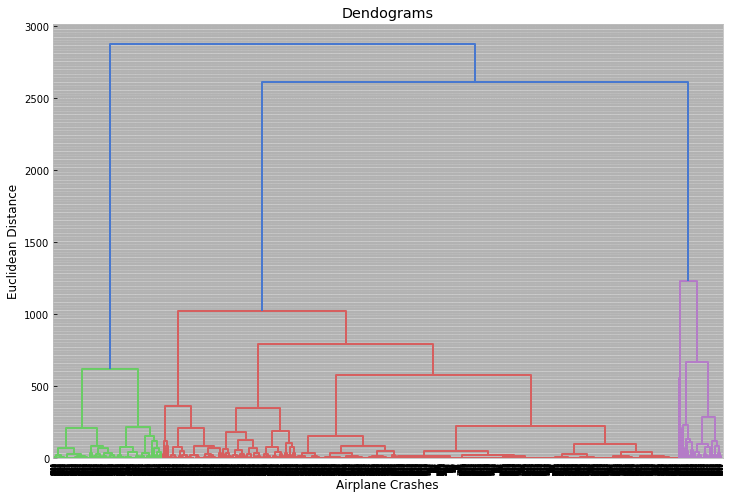

In [104]:
import scipy.cluster.hierarchy as clusterhierarchy
# linkage is the algorithm we apply for the hierarchical clustering, data_hierarchy is our dataset
# Dendrogram is used to find the optimal k or number of clusters which is denoted by number of vertical lines, which are 3
plt.figure(figsize=(12, 8))
plt.title("Dendograms")
plt.xlabel('Airplane Crashes')
plt.ylabel('Euclidean Distance')
dend = clusterhierarchy.dendrogram(clusterhierarchy.linkage(data_hierarchy, method='ward'))

In [105]:
from sklearn.cluster import AgglomerativeClustering
# In the hierarchical clustering the euclidean distance and ward method is chosen

hmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hmodel.fit(data_hierarchy)
labels = model.labels_

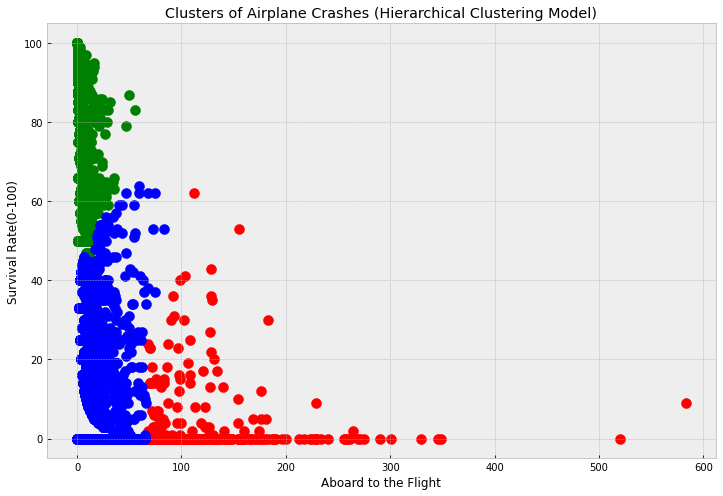

In [106]:
predictedvalues=hmodel.fit_predict(data_hierarchy)

# clusters can be visualized using the scatterplot and there 3 types of clusters divided according to the severity of the mortal rate


plt.scatter(data_hierarchy[predictedvalues==0, 0], data_hierarchy[predictedvalues==0, 1], s=100, c='red', label ='Low Mortality')
plt.scatter(data_hierarchy[predictedvalues==1, 0], data_hierarchy[predictedvalues==1, 1], s=100, c='green', label ='High Mortality')
plt.scatter(data_hierarchy[predictedvalues==2, 0], data_hierarchy[predictedvalues==2, 1], s=100, c='blue', label ='Average Mortality')
plt.title('Clusters of Airplane Crashes (Hierarchical Clustering Model)')
plt.xlabel('Aboard to the Flight')
plt.ylabel('Survival Rate(0-100)')
plt.show()